<a href="https://colab.research.google.com/github/SudheeraWSx/House_Price_Prediction_Boston_Housing_Dataset/blob/main/House_Price_Prediction_Using_Boston_Housing_Dataset_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction using Linear Regression**  
### A Univariate Regression


This notebook demonstrates how to build a simple **Linear Regression model** to predict house prices using the **Boston Housing Dataset**.  
We use `RM` (average number of rooms per dwelling) as the **feature** and `MEDV` (median house price in $1000s) as the **target variable**.  

### **Steps Covered in This Notebook:**  
1. Load and explore the dataset  
2. Perform **train-test split**  
3. Train a **Linear Regression model**  
4. Make predictions  
5. Evaluate model performance using **MAE, MSE, RMSE**  
6. Visualize predictions

###**1. Importing Pandas, Numpy and Matplotlib**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###**2. Importing dataset**

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###**3. Selecting the Feature: Number of Rooms per House (RM)**

In [7]:
# Selecting RM as feature and MEDV as target
X = df['rm']  # Feature (square footage equivalent)
y = df['medv']  # Target (house price)

# To print Head of x, y
X.head(), y.head()

(0    6.575
 1    6.421
 2    7.185
 3    6.998
 4    7.147
 Name: rm, dtype: float64,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: medv, dtype: float64)

###**4. Scatter Plot of No. of Rooms vs Median House Price**

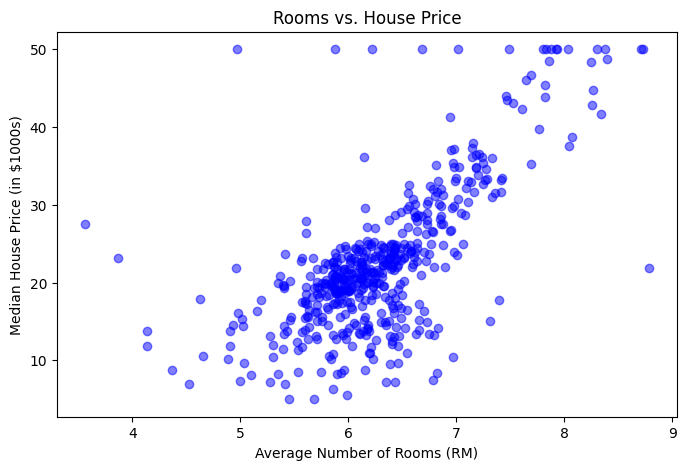

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Price (in $1000s)")
plt.title("Rooms vs. House Price")
plt.show()

*There is a linear trend. Therefore a Linear Regression model is suitable to predict house prices using this particular dataset.*

### **5. Train-Test Split using Sci-Kit Learn**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy().reshape(-1, 1), y, test_size=0.2, random_state=42)

# Create a model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)

# Get the learned parameters (slope & intercept)
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(m)
print(b)

9.348301406497727
-36.24631889813795


*X must not be a 1D array. 1D arrays won't work. If so `.reshape` it into a 2D array.*
</br>Ex:

> `x = [[1],[2],[3],[4]]`



### **6. Predictions using trained data**

In [14]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Print the first 5 predictions vs actual values
df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(df_results.head())

   Actual  Predicted
0    23.6  23.732383
1    32.4  26.929502
2    13.6  19.684568
3    22.8  20.451129
4    16.1  22.619935


###**7. Visualizing Predicted vs Actual Values**

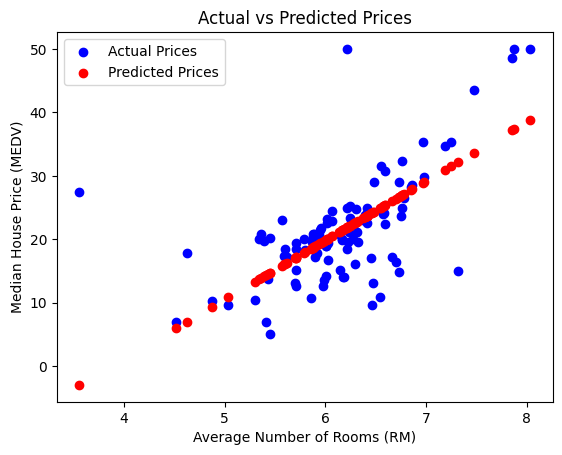

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price (MEDV)')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

*As I used this as an Univariate Linear Regression, predictions are way off from actual values. Need more features. (Multivariate)*

###**8. Calculating Error Metrics**

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root MSE

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 4.48
Mean Squared Error (MSE): 46.14
Root Mean Squared Error (RMSE): 6.79




> We are predicting house prices (MEDV), which are in $1000s of dollars (USD 1000 per unit).

> Mean Absolute Error (MAE) = 4.48

>On average, our model is `$4480`  off when predicting house prices.
Example: If a house is actually `$30,000`, our prediction could be around `$25,520 or $34,480.`
Mean Squared Error (MSE) = 46.14

> This is the average squared difference between actual and predicted prices.
We square the errors to penalize large mistakes more.
Root Mean Squared Error (RMSE) = 6.79

> This is similar to MSE but in the same units as the target (MEDV, or `$1000s`).
Our model’s predictions deviate by about `$6790` on average.
RMSE is more sensitive to big errors—so if it’s large, it means we might have some bad predictions.

